# For modifying and testing new image creation

Hello!  This in Matt's quick tutorial on how to create new model images
## Step 1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy
# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [2]:
tDir = '../targetDir/'
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING: target info class bad")
else:
    print("Target Good!")


Target Good!


In [3]:

# Get run info class
rInfo = tInfo.getRunInfo( )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))

Run 'run_0000' Good!


___
## Step 3
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

{'cmpArg': {'direct_compare_function': 'absolute_difference',
            'targetName': 'zoo_0',
            'targetType': 'target_image',
            'type': 'direct_image_comparison'},
 'comment': 'Starting score parameters '
            'file for '
            '587722984435351614',
 'imgArg': {'comment': 'Starting image '
                       'parameters for '
                       '587722984435351614',
            'galaxy_centers': {'px': 513,
                               'py': 514,
                               'sx': 309,
                               'sy': 608},
            'image_size': {'height': 1024,
                           'width': 1024},
            'name': 'zoo_0'},
 'name': 'zoo_0',
 'scoreType': 'model_fitness_score',
 'simArg': {'nPts': '100k',
            'name': '100k'}}


Text(0.5, 1.0, 'Starting Target Image')

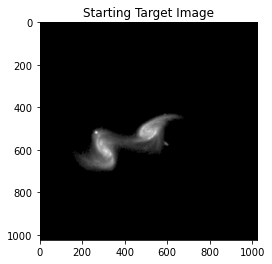

In [5]:
# Change image name if you want to grab a different image parameter
old_name = 'zoo_0'
old_params = tInfo.getImageParams(  )
old_param = old_params[old_name]

# This image parameter should have the correct size and pixel centers
gm.pprint( old_param )

#tInfo.addImageParams( old_param, overWrite = True )

# Get target image for 
target_image = tInfo.getTargetImage(old_name)
plt.imshow(target_image,cmap='gray')
plt.title("Starting Target Image")

In [6]:
# Get targets differing luminosities. 
os.listdir( tInfo.get('infoDir') )
pairLoc = gm.validPath( tInfo.get('infoDir') + 'target.pair' )

pFile = open( pairLoc )
m1 = 0
m2 = 0

for l in pFile:
    l = l.strip()
    
    if "primaryMagnitude" in l:
        m1 = float( l.split('=')[1] )
        
    elif "secondaryMagnitude" in l:
        m2 = float( l.split('=')[1] )
    
print( m1, m2 )
print( pairLoc )

13.770964 13.902212
/home/jovyan/galStuff/old-spam-data_2022-10/587722984435351614/information/target.pair


___
## Step 4: Create a new image parameter


In [7]:
# Create a blank group score parameter and copy starting parameters
newName = 'dl-s1-0'
new_params = {}
new_params[newName] = deepcopy( old_param )

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['imgArg']['name'] = newName

# Leave a comment if its for a specific experiment
cmt = 'Data Generation for Deep Learning Project Stage 1.'
new_params[newName]['imgArg']['comment'] = cmt

# Change particle countnew_params[newName]['imgArg']['image_size']['width'] = 50
new_params[newName]['simArg'] = {'nPts': 4000,
                                'name': '4k-r',
                                'ratio': m2/m1 }

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 128
new_params[newName]['imgArg']['image_size']['height'] = 128

# For resizing image
new_params[newName]['imgArg'].pop('galaxy_centers')
new_params[newName]['imgArg']['target_resize'] = True

# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = 0.75

# If you want to modify the radial brightness constant
new_params[newName]['imgArg']['radial_const'] = [ 1, 1 ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5

# Make sure scoring methods know to point to new image
new_params[newName]['cmpArg']['targetName'] = newName
gm.pprint(new_params)


{'dl-s1-0': {'cmpArg': {'direct_compare_function': 'absolute_difference',
                        'targetName': 'dl-s1-0',
                        'targetType': 'target_image',
                        'type': 'direct_image_comparison'},
             'comment': 'Starting score '
                        'parameters '
                        'file for '
                        '587722984435351614',
             'imgArg': {'blur': {'size': 5,
                                 'type': 'gaussian_blur',
                                 'weight': 0.75},
                        'comment': 'Data '
                                   'Generation '
                                   'for '
                                   'Deep '
                                   'Learning '
                                   'Project '
                                   'Stage '
                                   '1.',
                        'image_size': {'height': 128,
                                       '

___
## Step 4.1
### Create a new target Image
If the size and centers were modified, then create a new target image to match the size and centers



IC.adjustTargetImage:
	 - From: zoo_0
	 - To  : dl-s1-0
	 - Creating new galaxy centers: 
	 - From: ( 513 , 514 ) ; ( 309 , 608 )
	 -   To: (  64 ,  64 ) ; (  39 ,  76 )
	 - From points:
[[513. 514.]
 [309. 608.]
 [607. 718.]]
	 - To points:
[[64. 64.]
 [39. 76.]
 [76. 89.]]
	 - Warp Matrix
[[ 0.12344407  0.00194244 -0.32522001]
 [-0.00194244  0.12344407  1.54622215]]
	 - Writing to loc: /home/jovyan/galStuff/old-spam-data_2022-10/587722984435351614/information/target_images/target_dl-s1-0.png
	 - File should exist: /home/jovyan/galStuff/old-spam-data_2022-10/587722984435351614/information/target_images/target_dl-s1-0.png
<class 'numpy.ndarray'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


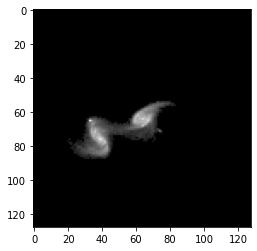

In [8]:
# Function in Image Creator that modifes
# exsiting target images to match new image

# Create and return new target image
n, tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True, printAll = True )
print( type( tImg ) )
print( tImg )

if type(tImg) != type(None):
    plt.imshow( tImg, cmap='gray')

else:
    print("WARNING!  Target image not found")

___
## Step 5
### Test if SIMR pipeline can create the new model image!

In [10]:

# Get run info class

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', True )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newSim', True )  # Make true if you want new image
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite

# Run through simr image creation
simr.run_new_score( rInfo=rInfo, cmdArg = newImgArg )
rInfo.printScores(allScores=True)

SIMR.run_new_score: 
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.run_new_score: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f302ffbc160>
	 - runID: run_0000
SM.main_sm_run:
	 - Run ID: run_0000
	 - rInfo status: True
	 - Simulations to run: 1

SM.new_simulation:
	 - New Simulation Name: 4k-r
IC: image_creator_run
	 - printAll
IC: given parameters: 1
IC:  dl-s1-0
IC: Creating image:
	 - runId: run_0000
	 - score: dl-s1-0
IC: Image 'dl-s1-0' already made for run_0000
	 - Creating image from points
	 - Saving model image at: /home/jovyan/galStuff/old-spam-data_2022-10/587722984435351614/zoo_merger_models/run_0000/model_images/dl-s1-0_model.png
	 - Saving unperturbed at: /home/jovyan/galStuff/old-spam-data_2022-10/587722984435351614/zoo_merger_models/run_0000/misc_images/dl-s1-0_init.png
IC_LOOP:    1 /    1: COMPLETE
MS: Run:
MS: scoreName: dl-s1-0
MS: target_compare_setup: dl-s1-0
	 -  paramName: dl-s1-0
	 -  modelName: dl-s1-0


___
## Step 5.1
### View results for the new Model Image!

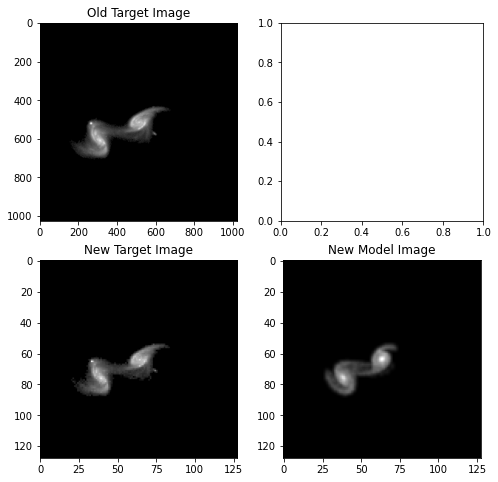

In [12]:
# View new model image next to target image
mImg = rInfo.getModelImage( newName )

fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage(old_param['cmpArg']['targetName']), cmap='gray' )

#ax[0,1].set_title("Old Model Image")
#ax[0,1].imshow( rInfo.getModelImage( old_param['imgArg']['name'] ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow(tImg,cmap='gray')

ax[1,1].set_title("New Model Image")
ax[1,1].imshow(mImg,cmap='gray')

___
## Step 6
### Save your new image parameters!

In [16]:
# Add to target image repository
tInfo.addImageParams( new_params )

tInfo.addScoreParameters( new_params )
tInfo.saveInfoFile()

# Or save to a location of your choosing
tInfoLoc = tInfo.get("infoDir")
imgParamLoc = '../param/' + 'param_zoo_test.json'
# gm.saveJson( new_params, imgParamLoc )